- bateau animation
- moyenne glissante ??

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import numpy as np
import numpy.ma as ma
import gsw 

from T_S_diagram import ts_diagram

from data_loading import get_LADCP, get_SADCP,get_CTD,get_bathy, get_altimetry_data


In [108]:
# Load the data from the file
year = 2019
years =[2019]
month = [6,7]

SADCP = get_SADCP(year)
LADCP = get_LADCP(year)
CTD = get_CTD(year)
bathy = get_bathy()
altimetry = get_altimetry_data(years, month)

proj = ccrs.Mercator(central_longitude=4.5, min_latitude=35.0, max_latitude=45.0)

# Comparing paths for CTD , SADCP and LADCP

In [65]:
fig, ax = plt.subplots(3,1,figsize=(20,20),subplot_kw={'projection': proj})
ax.flatten()

bathy.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap=cmo.topo,add_colorbar=False)
sc = ax[0].scatter (CTD['longitude'],CTD['latitude'], s=10, c=CTD['idx'], cmap=cmo.thermal, alpha=0.8,  transform=ccrs.PlateCarree())
ax[0].set_extent([0, 12, 38, 45], crs=ccrs.PlateCarree())
ax[0].add_feature(cfeature.LAND)
ax[0].add_feature(cfeature.COASTLINE)
ax[0].add_feature(cfeature.OCEAN)
ax[0].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[0], orientation='vertical', pad=0.02)
cbar.set_label('CTD Stations')
ax[0].set_title('CTD measurements locations')


bathy.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap=cmo.topo,add_colorbar=False)
sc = ax[1].scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap=cmo.thermal, alpha=0.8, transform=ccrs.PlateCarree())
ax[1].set_extent([0, 12, 38, 45], crs=ccrs.PlateCarree())
ax[1].add_feature(cfeature.LAND)
ax[1].add_feature(cfeature.COASTLINE)
ax[1].add_feature(cfeature.OCEAN)
ax[1].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[1], orientation='vertical', pad=0.02)
cbar.set_label('SADCP Stations')
ax[1].set_title('SADCP measurements locations')

bathy.plot(ax=ax[2], transform=ccrs.PlateCarree(),cmap=cmo.topo,add_colorbar=False)
sc = ax[2].scatter (LADCP['longitude'],LADCP['latitude'], s=10, c=LADCP['idx'],cmap = cmo.thermal, alpha=0.8,transform=ccrs.PlateCarree())
ax[2].set_extent([0, 12, 38, 45], crs=ccrs.PlateCarree())
ax[2].add_feature(cfeature.LAND)
ax[2].add_feature(cfeature.COASTLINE)
ax[2].add_feature(cfeature.OCEAN)
ax[2].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[2], orientation='vertical', pad=0.02)
cbar.set_label('LADCP Stations')


plt.show()

KeyboardInterrupt: 

# SADCP

## Choosing a path that passes through the front 

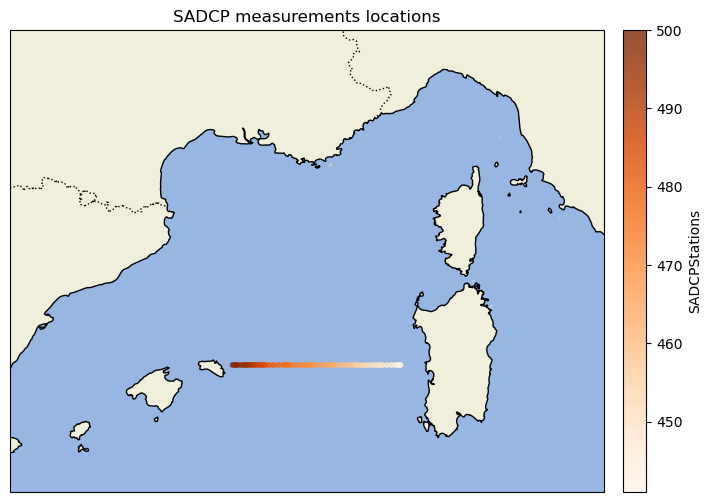

In [109]:
fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

N0 = 440
N1 = 500

sc = ax.scatter (SADCP['longitude'][N0:N1],SADCP['latitude'][N0:N1], s=10, c=SADCP['idx'][N0:N1], cmap='Oranges', alpha=0.8,transform=ccrs.PlateCarree())
ax.set_extent([0, 12, 38, 45])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCPStations')
ax.set_title('SADCP measurements locations')

plt.show()

In [110]:
# ALL the data - the last lign (NaN)
SADCP = SADCP.isel(depth=slice(0,-1)) 

# Mixed layer 
depth_m = SADCP.isel(depth=slice(0,5))

# Zoom in on front
Coupe = SADCP.where((SADCP['idx'] > N0) & (SADCP['idx'] < N1), drop=True)

## Hovmöller Diagrams (speeds / (depth and stations))

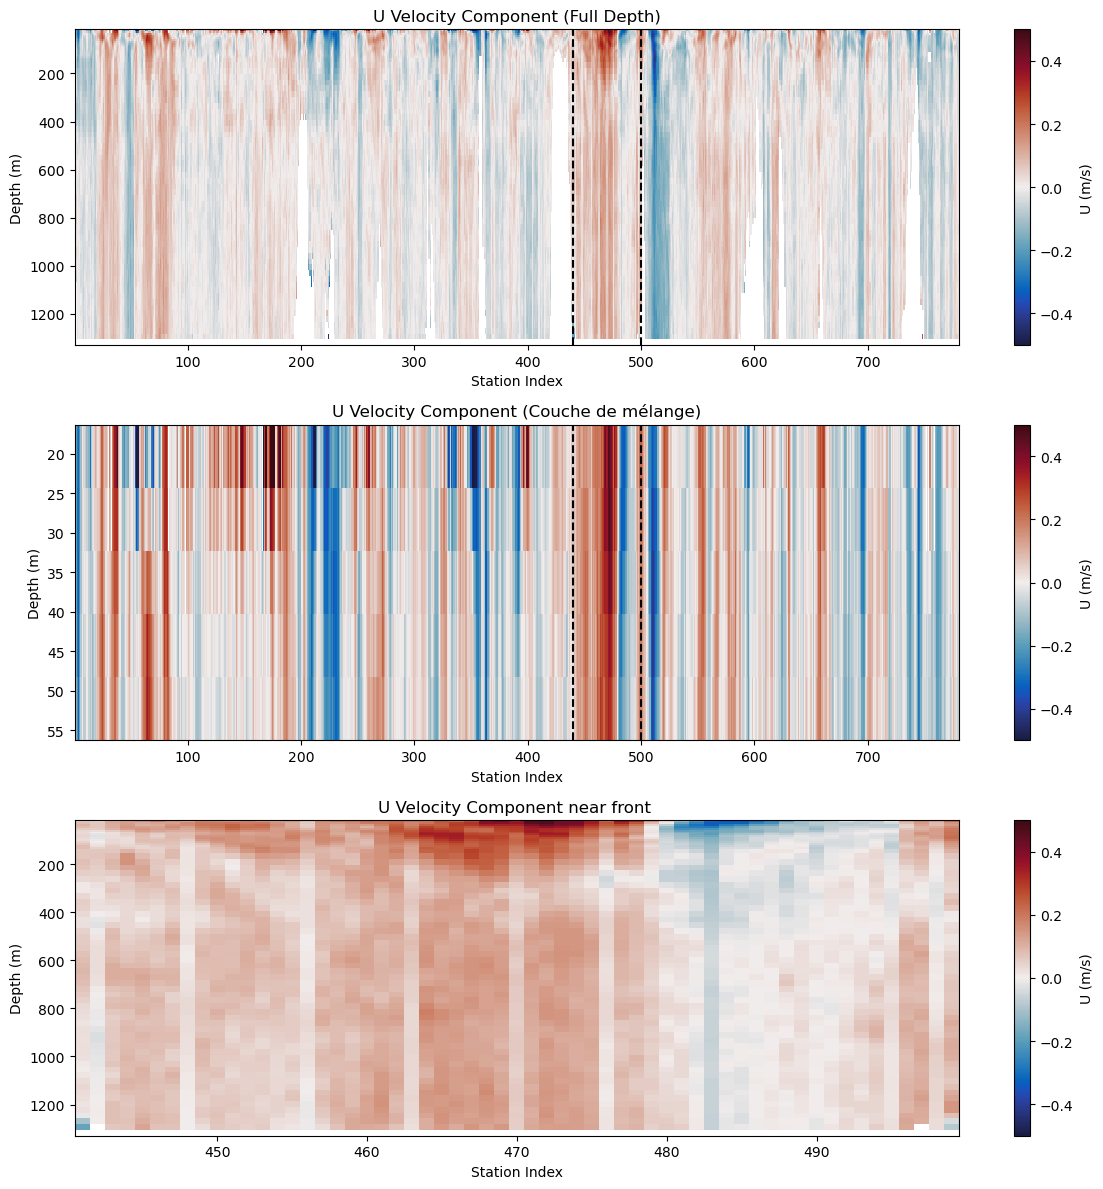

In [111]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

c = ax[0].pcolormesh(SADCP['idx'], SADCP['depth'], SADCP['U'].T, cmap=cmo.balance,vmin = -0.5,vmax = 0.5, shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('U Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('U (m/s)')
ax[0].axvline(x=N0, color='black', linestyle='--')
ax[0].axvline(x=N1, color='black', linestyle='--')
ax[0].invert_yaxis()


c = ax[1].pcolormesh(depth_m['idx'], depth_m['depth'], depth_m['U'].T, cmap=cmo.balance,vmin = -0.5,vmax = 0.5,  shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('U Velocity Component (Couche de mélange)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('U (m/s)')
ax[1].axvline(x=N0, color='black', linestyle='--')
ax[1].axvline(x=N1, color='black', linestyle='--')
ax[1].invert_yaxis()

c = ax[2].pcolormesh(Coupe['idx'], Coupe['depth'], Coupe['U'].T, cmap=cmo.balance,vmin = -0.5,vmax = 0.5,  shading='auto')
ax[2].set_xlabel('Station Index')
ax[2].set_ylabel('Depth (m)')
ax[2].set_title('U Velocity Component near front ')
cbar = fig.colorbar(c, ax=ax[2])
cbar.set_label('U (m/s)')
ax[2].invert_yaxis()



plt.tight_layout()
plt.show()





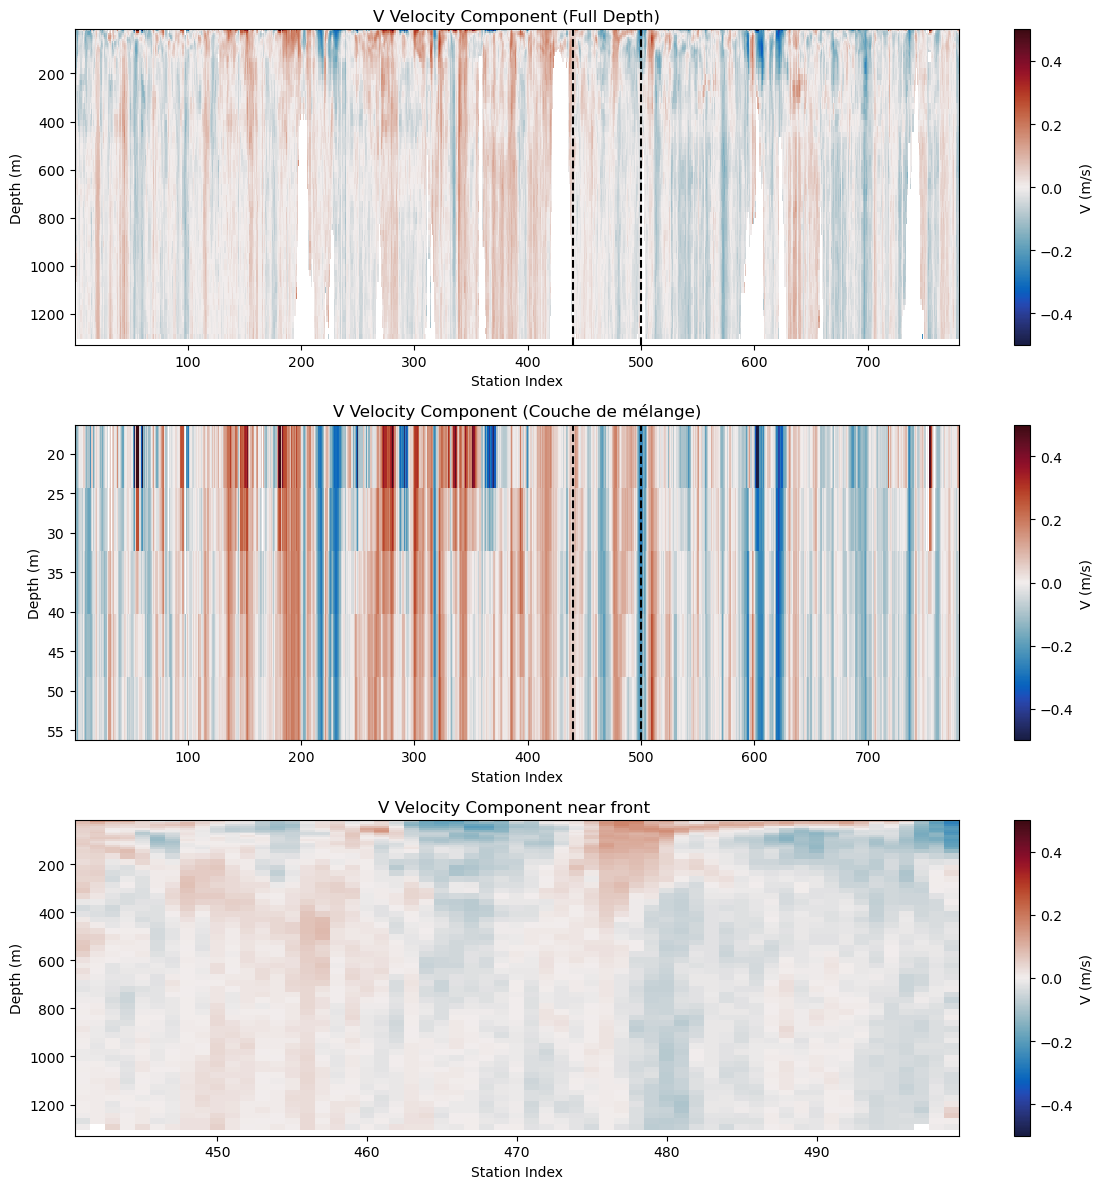

In [112]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

c = ax[0].pcolormesh(SADCP['idx'], SADCP['depth'], SADCP['V'].T, cmap=cmo.balance,vmin = -0.5,vmax = 0.5,shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('V Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('V (m/s)')
ax[0].axvline(x=N0, color='black', linestyle='--')
ax[0].axvline(x=N1, color='black', linestyle='--')
ax[0].invert_yaxis()


c = ax[1].pcolormesh(depth_m['idx'], depth_m['depth'], depth_m['V'].T, cmap=cmo.balance,vmin = -0.5,vmax = 0.5,  shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('V Velocity Component (Couche de mélange)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('V (m/s)')
ax[1].axvline(x=N0, color='black', linestyle='--')
ax[1].axvline(x=N1, color='black', linestyle='--')
ax[1].invert_yaxis()

c = ax[2].pcolormesh(Coupe['idx'], Coupe['depth'], Coupe['V'].T, cmap=cmo.balance,vmin = -0.5,vmax = 0.5,  shading='auto')
ax[2].set_xlabel('Station Index')
ax[2].set_ylabel('Depth (m)')
ax[2].set_title('V Velocity Component near front ')
cbar = fig.colorbar(c, ax=ax[2])
cbar.set_label('V (m/s)')
ax[2].invert_yaxis()



plt.tight_layout()
plt.show()





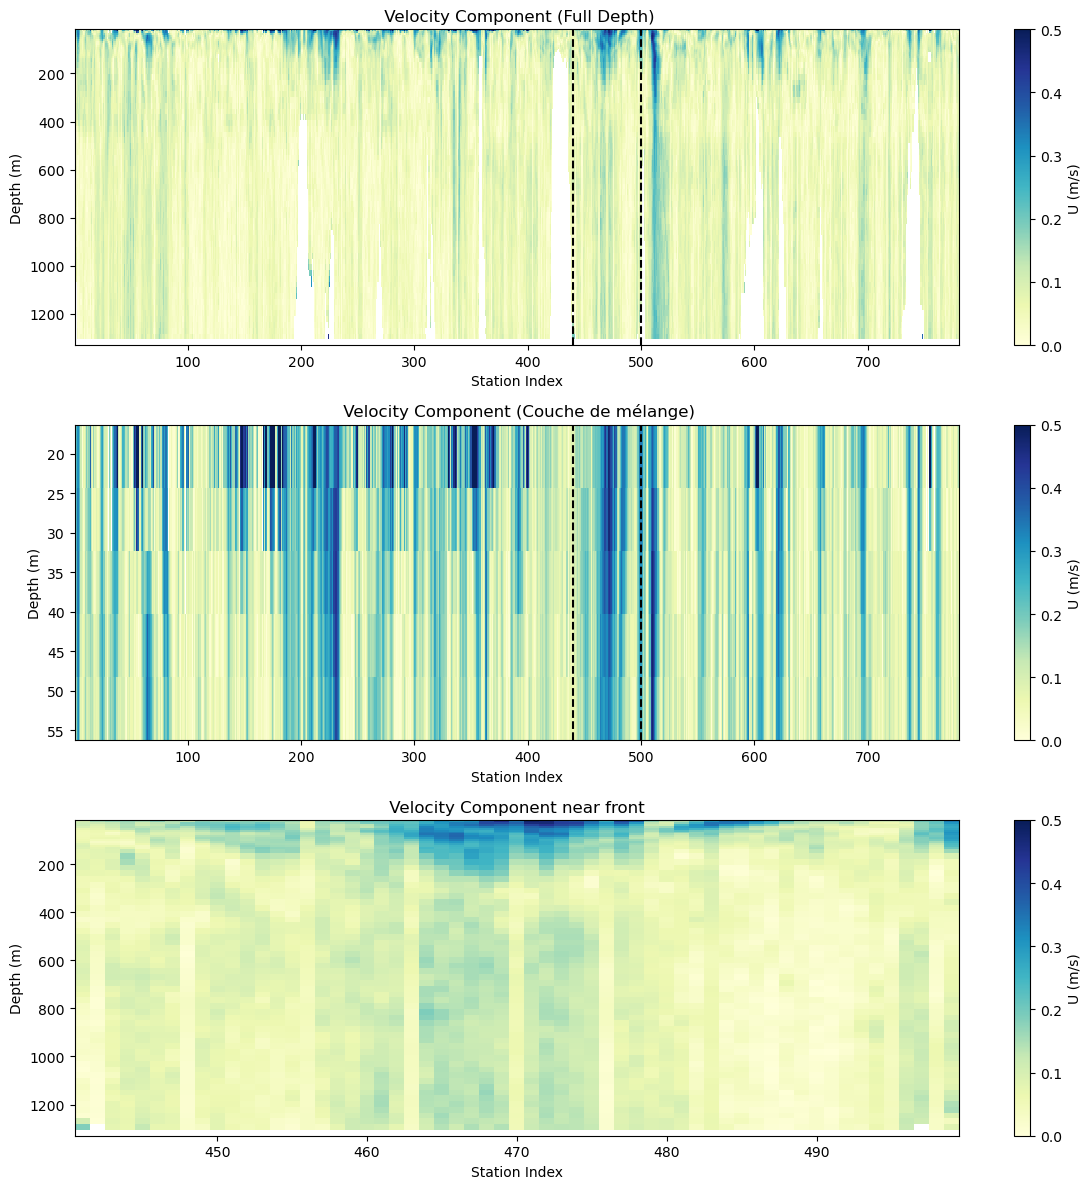

In [113]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

c = ax[0].pcolormesh(SADCP['idx'], SADCP['depth'], np.sqrt(SADCP['U'].T**2 +SADCP['V'].T**2), cmap='YlGnBu' ,vmin = 0 ,vmax = 0.5, shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title(' Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('U (m/s)')
ax[0].axvline(x=N0, color='black', linestyle='--')
ax[0].axvline(x=N1, color='black', linestyle='--')
ax[0].invert_yaxis()


c = ax[1].pcolormesh(depth_m['idx'], depth_m['depth'], np.sqrt(depth_m['U'].T**2 + depth_m['V'].T**2),cmap='YlGnBu',vmin = 0,vmax = 0.5,  shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title(' Velocity Component (Couche de mélange)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('U (m/s)')
ax[1].axvline(x=N0, color='black', linestyle='--')
ax[1].axvline(x=N1, color='black', linestyle='--')
ax[1].invert_yaxis()

c = ax[2].pcolormesh(Coupe['idx'], Coupe['depth'], np.sqrt(Coupe['U'].T**2+Coupe['V'].T**2), cmap='YlGnBu',vmin = 0,vmax = 0.5,  shading='auto')
ax[2].set_xlabel('Station Index')
ax[2].set_ylabel('Depth (m)')
ax[2].set_title(' Velocity Component near front ')
cbar = fig.colorbar(c, ax=ax[2])
cbar.set_label('U (m/s)')
ax[2].invert_yaxis()



plt.tight_layout()
plt.show()





## Vecteur parcours 


In [114]:
Fleche = SADCP.isel(depth = slice(0,5) )
Fleched = Fleche.mean('depth')


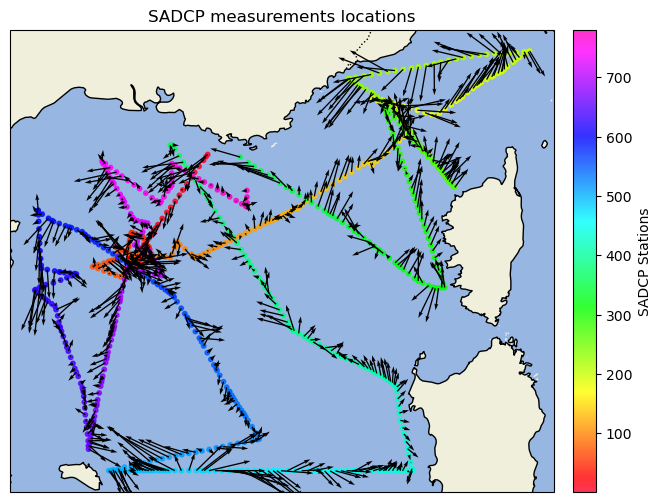

In [160]:

fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

sc = ax.scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8,  transform = ccrs.PlateCarree())
q = ax.quiver(Fleched['longitude'], Fleched['latitude'], Fleched['U'],Fleched['V'],  transform=ccrs.PlateCarree(), scale=4, color='black')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCP Stations')
ax.set_title('SADCP measurements locations')

plt.show()

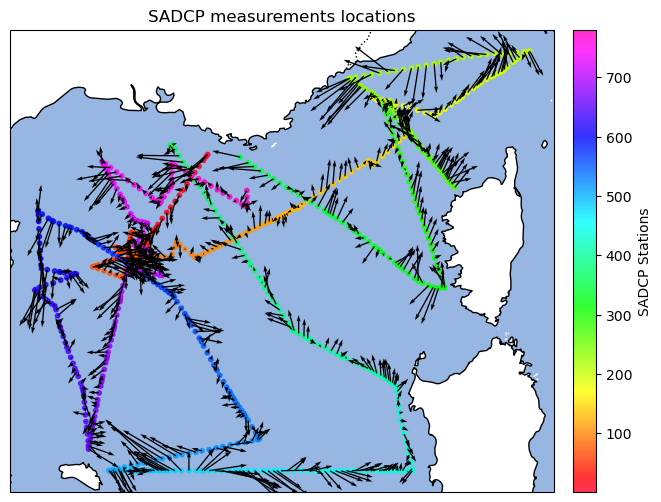

In [161]:
Fleche1 = SADCP.isel(depth = 3 )
fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

sc = ax.scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8,  transform = ccrs.PlateCarree())
q = ax.quiver(Fleche1['longitude'], Fleche1['latitude'], Fleche1['U'],Fleche1['V'],  transform=ccrs.PlateCarree(), scale=4, color='black')
#ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCP Stations')
ax.set_title('SADCP measurements locations')

plt.show()



# LADCP

## Choosing a path that passes through the front

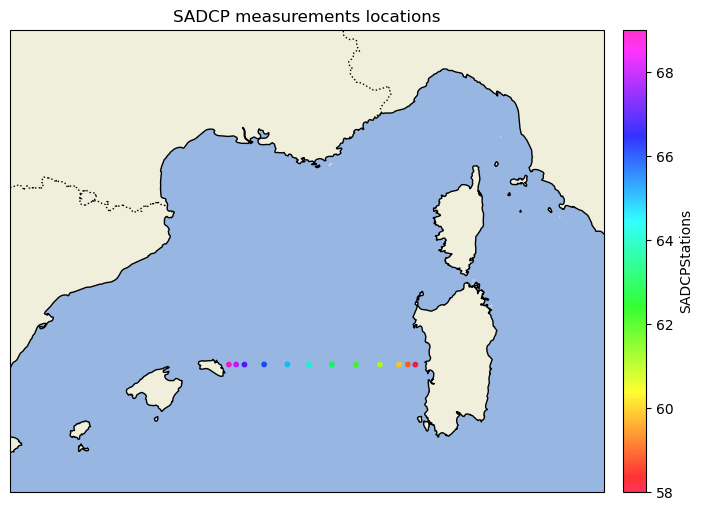

In [117]:
fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

N2 = 58
N3 = 70

sc = ax.scatter (LADCP['longitude'][N2:N3],LADCP['latitude'][N2:N3], s=10, c=LADCP['idx'][N2:N3], cmap='gist_rainbow', alpha=0.8,transform=ccrs.PlateCarree())
ax.set_extent([0, 12, 38, 45])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCPStations')
ax.set_title('SADCP measurements locations')

plt.show()

In [118]:
Coupe1 = LADCP.where((LADCP['idx'] > N2) & (LADCP['idx'] < N3), drop=True)

## Hovmöller Diagrams (speeds / (depth and stations))

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_1435/3657463716.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


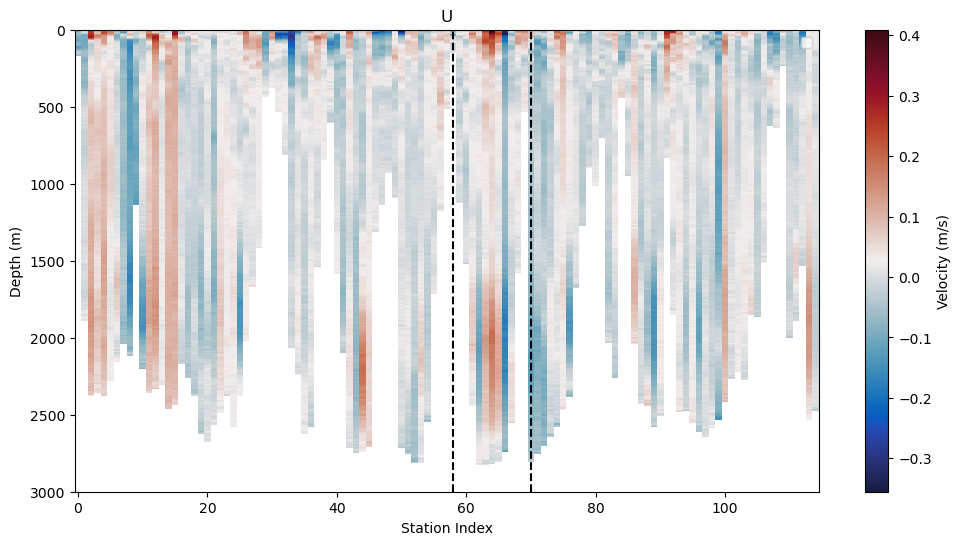

In [119]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First subplot for LADCP
c1 = ax1.pcolormesh(LADCP['idx'], LADCP['depth'], LADCP['U'].T, cmap=cmo.balance, shading='nearest')  # Transpose if needed
ax1.set_xlabel('Station Index')
ax1.set_ylabel('Depth (m)')
ax1.set_title('U')
cbar1 = fig.colorbar(c1, ax=ax1)
cbar1.set_label('Velocity (m/s)')
ax1.set_ylim([0, 3000])
ax1.invert_yaxis()


# Add vertical lines at N2 and N3
ax1.axvline(x=N2, color='black', linestyle='--')
ax1.axvline(x=N3, color='black', linestyle='--')
ax1.legend()

plt.show()


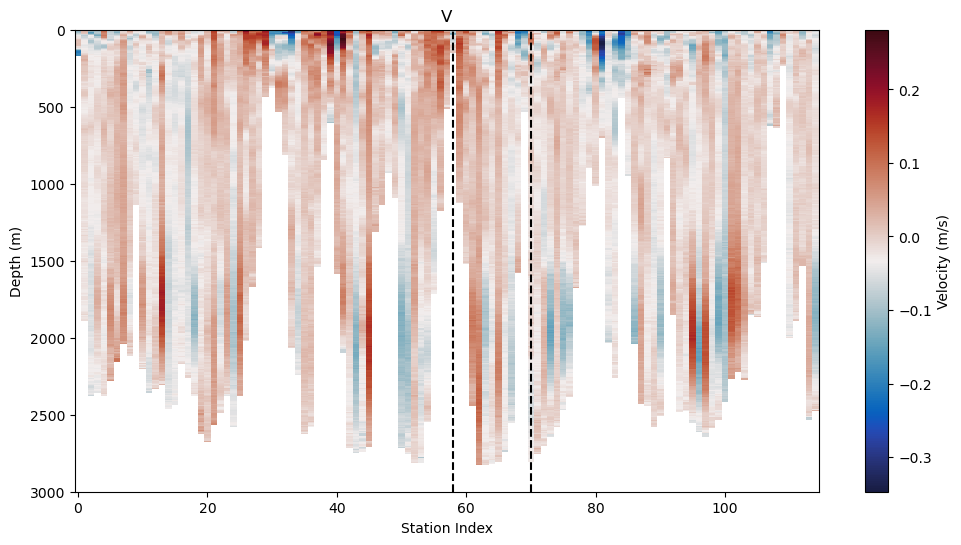

In [120]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First subplot for LADCP
c1 = ax1.pcolormesh(LADCP['idx'], LADCP['depth'], LADCP['V'].T, cmap=cmo.balance, shading='nearest')  # Transpose if needed
ax1.set_xlabel('Station Index')
ax1.set_ylabel('Depth (m)')
ax1.set_title('V')
cbar1 = fig.colorbar(c1, ax=ax1)
cbar1.set_label('Velocity (m/s)')
ax1.set_ylim([0, 3000])
ax1.invert_yaxis()

# Add vertical lines at N2 and N3
ax1.axvline(x=N2, color='black', linestyle='--')
ax1.axvline(x=N3, color='black', linestyle='--')

plt.show()


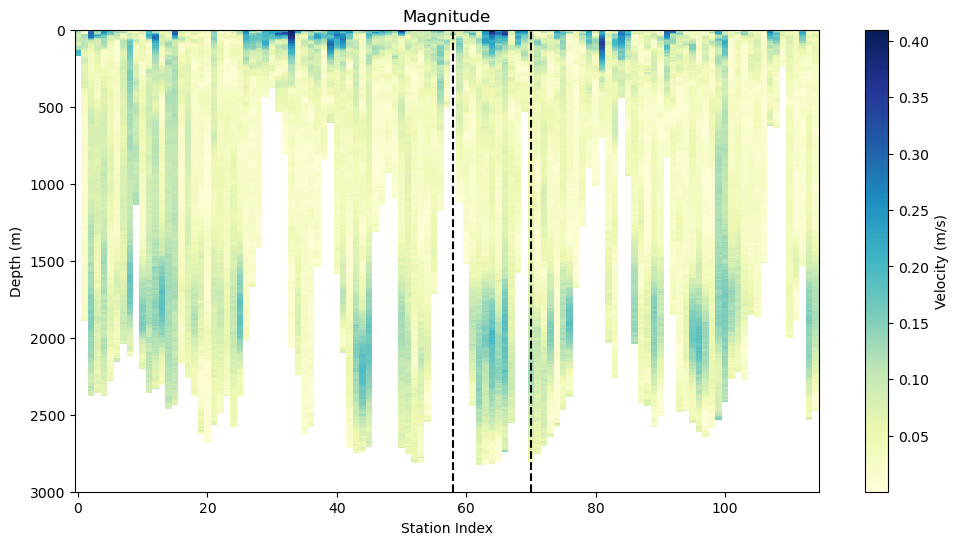

In [121]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First subplot for LADCP
c1 = ax1.pcolormesh(LADCP['idx'], LADCP['depth'], np.sqrt(LADCP['V'].T**2 +LADCP['U'].T**2), cmap='YlGnBu', shading='nearest')  # Transpose if needed
ax1.set_xlabel('Station Index')
ax1.set_ylabel('Depth (m)')
ax1.set_title('Magnitude')
cbar1 = fig.colorbar(c1, ax=ax1)
cbar1.set_label('Velocity (m/s)')
ax1.set_ylim([0, 3000])
ax1.invert_yaxis()

# Add vertical lines at N2 and N3
ax1.axvline(x=N2, color='black', linestyle='--')
ax1.axvline(x=N3, color='black', linestyle='--')

plt.show()

## Vecteur 

In [122]:
Fleche1 = LADCP.isel(depth = slice(0,5) )
Fleched1 = Fleche1.mean('depth')


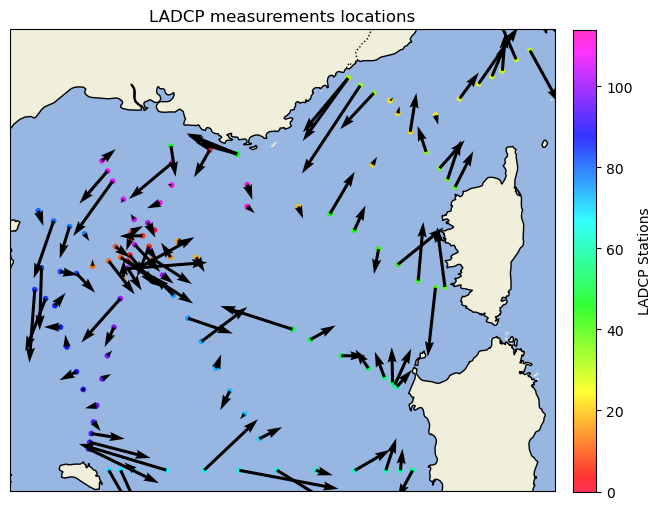

In [158]:

fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

sc = ax.scatter (LADCP['longitude'],LADCP['latitude'], s=10, c=LADCP['idx'], cmap='gist_rainbow', alpha=0.8,  transform = ccrs.PlateCarree())
q = ax.quiver(Fleched1['longitude'], Fleched1['latitude'], Fleched1['U'],Fleched1['V'],  transform=ccrs.PlateCarree(), scale=2, color='black')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('LADCP Stations')
ax.set_title('LADCP measurements locations')

plt.show()

In [124]:
altimetry_sorted = altimetry.sortby('time')

In [135]:
start_date = 7
end_date = 31

altimetry_selected = altimetry_sorted.isel(time=slice(start_date, end_date))

moy= altimetry_selected.mean(dim='time')

moy['ugos']

<xarray.DataArray 'ugos' (latitude: 128, longitude: 344)> Size: 352kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float32 512B 30.06 30.19 30.31 ... 45.69 45.81 45.94
  * longitude  (longitude) float32 1kB -5.938 -5.812 -5.688 ... 36.81 36.94

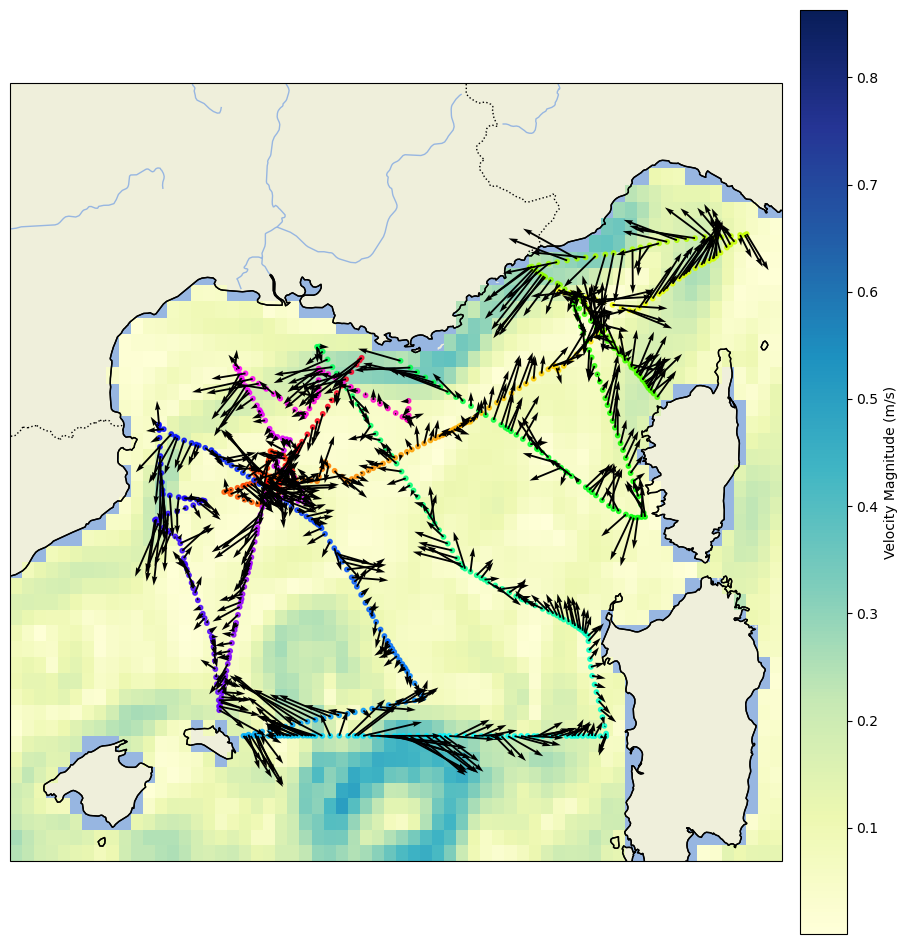

In [170]:
# Calculate the magnitude of the velocity
magnitude = np.sqrt(moy['ugos']**2 + moy['vgos']**2)

fig, ax = plt.subplots(1, 1, figsize=(12, 12), subplot_kw={'projection': proj})

# Plot the magnitude
c = ax.pcolormesh(moy['longitude'], moy['latitude'], magnitude, cmap='YlGnBu', shading='auto', transform=ccrs.PlateCarree())
sc = ax.scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8,  transform = ccrs.PlateCarree())
q = ax.quiver(Fleched['longitude'], Fleched['latitude'], Fleched['U'],Fleched['V'],  transform=ccrs.PlateCarree(), scale=4, color='black')

ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)

# Set the extent
ax.set_extent([2, 10, 39, 45], crs=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Velocity Magnitude (m/s)')

plt.show()


In [181]:
moy['latitude']

<xarray.DataArray 'latitude' (latitude: 128)> Size: 512B
array([30.0625, 30.1875, 30.3125, 30.4375, 30.5625, 30.6875, 30.8125, 30.9375,
       31.0625, 31.1875, 31.3125, 31.4375, 31.5625, 31.6875, 31.8125, 31.9375,
       32.0625, 32.1875, 32.3125, 32.4375, 32.5625, 32.6875, 32.8125, 32.9375,
       33.0625, 33.1875, 33.3125, 33.4375, 33.5625, 33.6875, 33.8125, 33.9375,
       34.0625, 34.1875, 34.3125, 34.4375, 34.5625, 34.6875, 34.8125, 34.9375,
       35.0625, 35.1875, 35.3125, 35.4375, 35.5625, 35.6875, 35.8125, 35.9375,
       36.0625, 36.1875, 36.3125, 36.4375, 36.5625, 36.6875, 36.8125, 36.9375,
       37.0625, 37.1875, 37.3125, 37.4375, 37.5625, 37.6875, 37.8125, 37.9375,
       38.0625, 38.1875, 38.3125, 38.4375, 38.5625, 38.6875, 38.8125, 38.9375,
       39.0625, 39.1875, 39.3125, 39.4375, 39.5625, 39.6875, 39.8125, 39.9375,
       40.0625, 40.1875, 40.3125, 40.4375, 40.5625, 40.6875, 40.8125, 40.9375,
       41.0625, 41.1875, 41.3125, 41.4375, 41.5625, 41.6875, 41.8125, 41.9375,
       42.0625, 42.1875, 42.3125, 42.4375, 42.5625, 42.6875, 42.8125, 42.9375,
       43.0625, 43.1875, 43.3125, 43.4375, 43.5625, 43.6875, 43.8125, 43.9375,
       44.0625, 44.1875, 44.3125, 44.4375, 44.5625, 44.6875, 44.8125, 44.9375,
       45.0625, 45.1875, 45.3125, 45.4375, 45.5625, 45.6875, 45.8125, 45.9375],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 512B 30.06 30.19 30.31 ... 45.69 45.81 45.94
Attributes:
    axis:           Y
    bounds:         lat_bnds
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_max:      45.9375
    valid_min:      30.0625

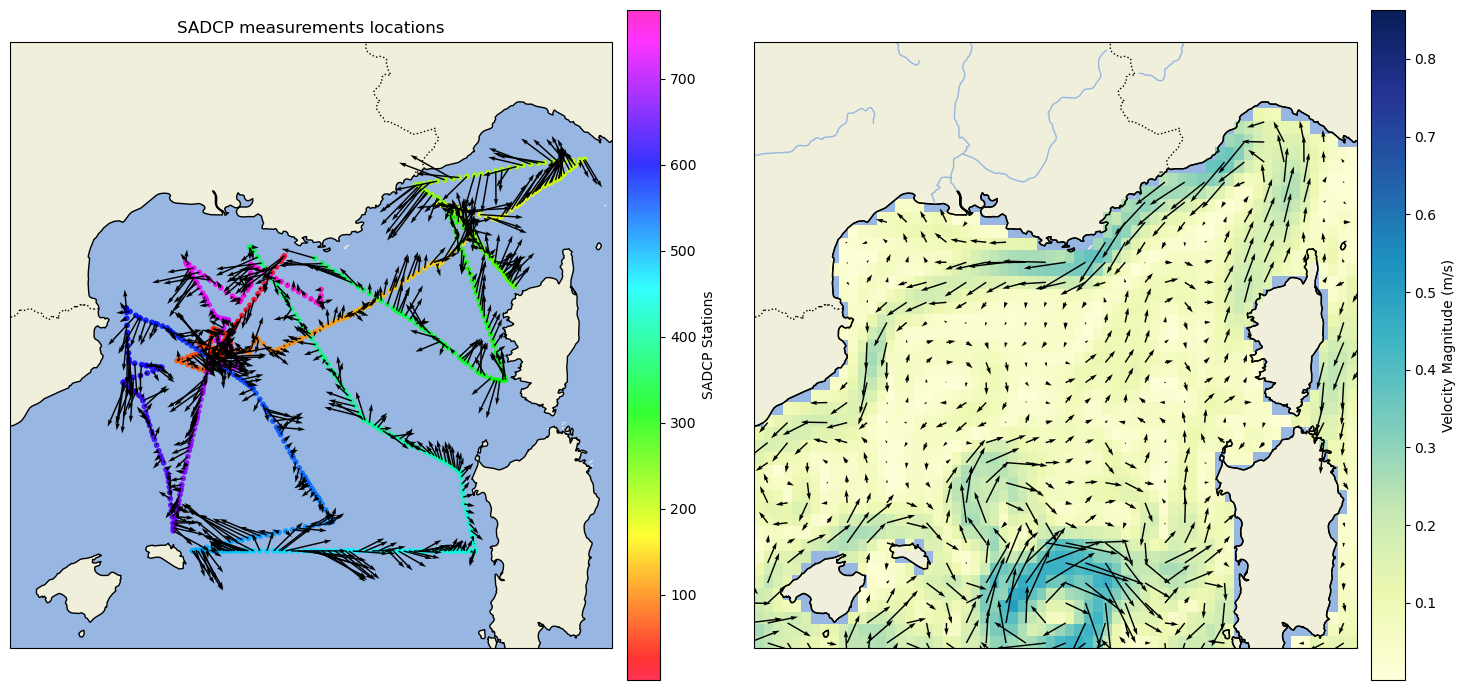

In [189]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), subplot_kw={'projection': proj})
n = 4
# First plot
sc1 = ax1.scatter(SADCP['longitude'], SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8, transform=ccrs.PlateCarree())
q1 = ax1.quiver(Fleched['longitude'], Fleched['latitude'], Fleched['U'], Fleched['V'], transform=ccrs.PlateCarree(), scale=4, color='black')
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
cbar1 = plt.colorbar(sc1, ax=ax1, orientation='vertical', pad=0.02)
cbar1.set_label('SADCP Stations')
ax1.set_title('SADCP measurements locations')
ax1.set_extent([2, 10, 39, 45], crs=ccrs.PlateCarree())

# Plot the magnitude
c = ax2.pcolormesh(moy['longitude'], moy['latitude'], magnitude, cmap='YlGnBu', shading='auto', transform=ccrs.PlateCarree())
q1 = ax2.quiver(moy['longitude'].values, moy['latitude'].values,moy['ugos'].values, moy['vgos'].values, transform=ccrs.PlateCarree(), scale=4, color='black', regrid_shape =50)
ax2.coastlines()
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.RIVERS)
ax2.add_feature(cfeature.LAKES)
ax2.set_extent([2, 10, 39, 45], crs=ccrs.PlateCarree())

# Add colorbar
cbar2 = plt.colorbar(c, ax=ax2, orientation='vertical', pad=0.02)
cbar2.set_label('Velocity Magnitude (m/s)')

plt.tight_layout()
plt.show()

(115, 5)

In [155]:
print(Fleche['longitude'].shape)
print(Fleche['latitude'].shape)
print(Fleche['U'].shape)
print(Fleche['V'].shape)

(780,)
(780,)
(780, 5)
(780, 5)


In [187]:
altimetry_sorted

<xarray.Dataset> Size: 151MB
Dimensions:    (time: 61, latitude: 128, nv: 2, longitude: 344)
Coordinates:
  * time       (time) datetime64[ns] 488B 2019-06-01 2019-06-02 ... 2019-07-31
  * latitude   (latitude) float32 512B 30.06 30.19 30.31 ... 45.69 45.81 45.94
  * longitude  (longitude) float32 1kB -5.938 -5.812 -5.688 ... 36.81 36.94
  * nv         (nv) int32 8B 0 1
Data variables:
    crs        (time) int32 244B -2147483647 -2147483647 ... -2147483647
    lat_bnds   (time, latitude, nv) float32 62kB 30.0 30.12 30.12 ... 45.88 46.0
    lon_bnds   (time, longitude, nv) float32 168kB -6.0 -5.875 ... 36.88 37.0
    err        (time, latitude, longitude) float64 21MB nan nan nan ... nan nan
    adt        (time, latitude, longitude) float64 21MB nan nan nan ... nan nan
    ugos       (time, latitude, longitude) float64 21MB nan nan nan ... nan nan
    vgos       (time, latitude, longitude) float64 21MB nan nan nan ... nan nan
    sla        (time, latitude, longitude) float64 21MB nan nan nan ... nan nan
    ugosa      (time, latitude, longitude) float64 21MB nan nan nan ... nan nan
    vgosa      (time, latitude, longitude) float64 21MB nan nan nan ... nan nan
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2019-06-19T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2019-06-19T00:00:00Z
    title:                           DT merged all satellites Mediterranean S...